In [1]:
import os
path = os.path.join('/home/scuervo/Documents/dev/reservoirpy')
import sys
sys.path.insert(0,path)

import numpy as np
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reservoirpy.wellproductivitypy import decline as dc
from reservoirpy.wellpy import path as ph


In [16]:
pr1 = ph.well(name='pr-1',fq='A')


p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

p50 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

pr1.add_schedule(
    {
        'p90':p90,
        'p50':p50,
        'p10':p10
    }
)



In [17]:
f1 = pr1.schedule_forecast()
f1

,qo,vo,np,period,case
time,,,,,
2021-01-31,2902.97,81283.26,81283.26,initial,p90
2021-02-28,2815.25,87272.71,168555.97,initial,p90
2021-03-31,2721.21,81636.41,250192.39,initial,p90
2021-04-30,2633.20,81629.32,331821.71,initial,p90
2021-05-31,2545.25,76357.49,408179.20,initial,p90
...,...,...,...,...,...
2029-07-31,676.68,20977.01,4043113.79,initial,p10
2029-08-31,671.53,20145.96,4063259.75,initial,p10
2029-09-30,666.63,20665.41,4083925.16,initial,p10


<AxesSubplot:xlabel='time', ylabel='qo'>

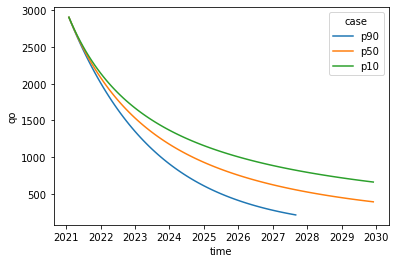

In [18]:
sns.lineplot(data=f1, x=f1.index, y='qo', hue='case')

In [19]:
pr1.cashflow

{'p90': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7fb023f5aca0>,
  'depreciation': <reservoirpy.cashflows.timeseries.cash at 0x7fb023f55eb0>},
 'p50': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7fb023f82280>,
  'depreciation': <reservoirpy.cashflows.timeseries.cash at 0x7fb023f55e80>},
 'p10': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7fb023f82220>,
  'depreciation': <reservoirpy.cashflows.timeseries.cash at 0x7fb0240437f0>}}